In [1]:
from pathlib import Path

from mess_io_proto import surface

ane_mess_inp = Path("ane_mess.inp")
ene_mess_inp = Path("ene_mess.inp")

ane_spc_inp = Path("ane_species.csv")
ene_spc_inp = Path("ene_species.csv")

In [2]:
ane_surf = surface.from_mess(ane_mess_inp, spc_inp=ane_spc_inp)
ane_surf = surface.with_energies_relative_to(ane_surf, 28)
ane_surf = surface.without_fake_wells(ane_surf)
# surface.display_network(ane_surf)

In [3]:
ene_surf = surface.from_mess(ene_mess_inp, spc_inp=ene_spc_inp)
ene_surf = surface.with_energies_relative_to(ene_surf, 25)
ene_surf = surface.without_fake_wells(ene_surf)
# surface.display_network(ene_surf)

<Figure size 1000x500 with 0 Axes>

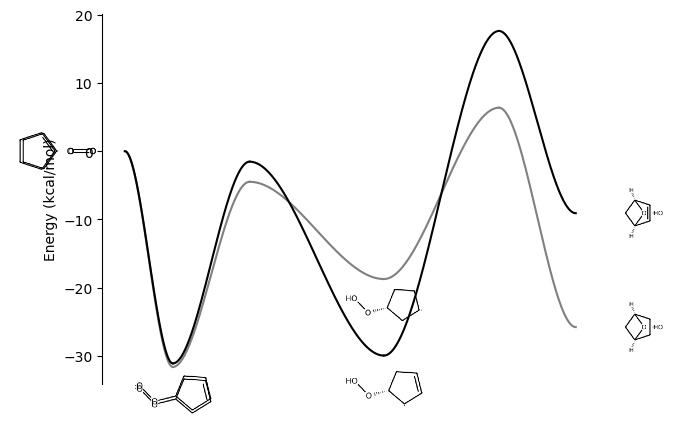

In [6]:
from importlib import reload

from matplotlib import pyplot

reload(surface)

size = (10, 5)
fig = pyplot.figure(figsize=size)
fig = pyplot.figure()


class Color:
    black = "#000000"
    gray1 = "#808080FF"
    gray2 = "#BFBFBFFF"
    red = "#FF2E2EFF"
    blue = "#4D4DFFFF"
    blue1 = "#9999ffff"
    green = "#31FF31FF"
    green1 = "#99ff99ff"
    yellow = "#ffcd00ff"


ane_path = [28, 0, 3, 23]
ane_color = Color.gray1

ene_path = [25, 11, 1, 23]
ene_color = Color.black

fig = surface.plot_paths(
    ane_surf,
    paths=[ane_path],
    fig=fig,
    colors=[ane_color],
    stereo=True,
    coord_dct={
        28: -0.5,
        0: 0,
        frozenset({0, 3}): 0.8,
        3: 2.2,
        frozenset({3, 23}): 3.4,
        23: 4.2,
    },
)

fig = surface.plot_paths(
    ene_surf,
    paths=[ene_path],
    fig=fig,
    colors=[ene_color],
    stereo=True,
    coord_dct={
        25: -0.5,
        11: 0,
        frozenset({11, 1}): 0.8,
        1: 2.2,
        frozenset({1, 23}): 3.4,
        23: 4.2,
    },
)

pyplot.savefig("trapping.svg")